In [682]:
# Change here using YOUR own first and last names
fn1 = "guillaume"
ln1 = "capitan"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_capitan_guillaume.ipynb


***<h1>TP2 : Linear regression</h1>***

<h3>Q1./<strong> Preliminaries and preprocessing</strong>

In [683]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import os as os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from scipy.stats import t

#Setting the random seed to 0
np.random.seed(0)

#Checking I am in the right directory
os.getcwd()

'C:\\Users\\Guillaume\\Desktop\\SD-TSIA204 - Linear Models\\tp2'

In [684]:
#Data loading
#As a reminder, Y is the very last column of the data, the rest are X (measurements)

data = pd.read_csv("data_dm3.csv", header=None)
#We may want the last column to be the header. It is the one containing Y. 

data.describe() 

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,...,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,1.004727e-17,-8.037814e-18,1.607563e-17,0.000000,-4.018907e-18,-8.037814e-18,2.612289e-17,4.018907e-18,0.000000,-1.205672e-17,...,-1.205672e-17,0.000000,1.808508e-17,-4.018907e-18,3.014180e-18,1.281027e-17,8.037814e-18,1.205672e-17,1.406617e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,...,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007,-2.695861e+00,...,-3.059475e+00,-3.206539,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-0.671547,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-0.666675,-6.930021e-01,...,-6.885118e-01,-0.579332,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,0.000066,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,0.000605,3.602406e-02,...,-2.994795e-02,0.025405,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,0.688197,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,0.629808,6.629150e-01,...,6.672697e-01,0.667664,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090,3.032505e+00,...,2.677458e+00,2.806877,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In the table above, we have ***printed***, among other specifics, the mean and standard deviation of the covariates. However, because they're so numerous, printing all of them would be tedious and unreadable, so I will ***plot*** them as well, which will allow us to see better:

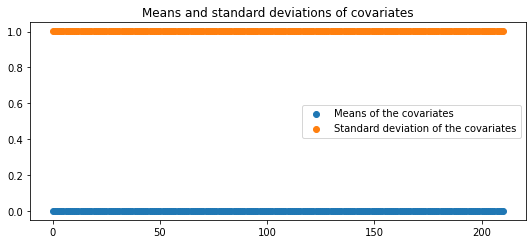

In [685]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

mean = data.describe().iloc[1][0:210]
std = data.describe().iloc[2][0:210]

Xab = np.linspace(0, 210, 210)
plt.scatter(Xab, mean, label='Means of the covariates')
plt.scatter(Xab, std, label='Standard deviation of the covariates')
plt.title('Means and standard deviations of covariates')
plt.legend()
plt.show()

 This plot shows that all variables are ***centered***, and ***standardized***. I will now check if they are ***normalized***:

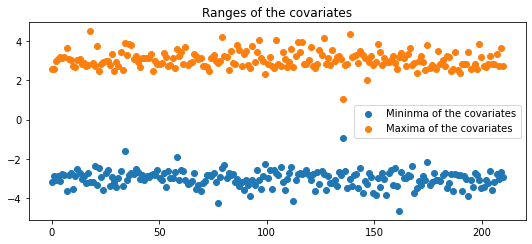

In [686]:
min = data.describe().iloc[3][0:210]
max = data.describe().iloc[7][0:210]

Xab = np.linspace(0, 210, 210)
plt.scatter(Xab, min, label='Mininma of the covariates')
plt.scatter(Xab, max, label='Maxima of the covariates')
plt.title('Ranges of the covariates')
plt.legend()
plt.show()

Clearly the data is ***not normalized*** at all. Maxima and minima should all be contained between 0 and 1 (or -1 and 1 according to some definitions), but here the covariates range as far from -4 to 4. 

<h3><strong> Data separation</strong>

We seperate the matrix into X and Y, X being the 210 first columns and Y the last column containing what we are trying to predict.
X will contain the measurements. 

In [687]:
X = data.iloc[:,:210]
Y = data.iloc[:,210]
#iloc allows to slice pandas dataframes. 

<h5> Let's mathematically check that the covariates are centered and standardized, as a plot might hide some tiny errors: </h5>

In [688]:
#By taking into consideration numerical approximation errors, we have the following test:
all(abs(X.describe().iloc[1]) < 0.01)

True

><h4>This shows the data is definitely centered. </h4>

In [689]:
#Let's do the same with the third row, containing the std deviations.
all(abs(X.describe().iloc[2]-1) < 0.01)

True

><h4>This shows the data is definitely standardized as well. </h4>

In [690]:
#Just to be sure, let's also check Y:
Y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: 210, dtype: float64

><h4>The observation isn't centered nor standardized, even though the exploratory variables are.</h4>

<h3><strong> Test and Train sets</strong>

In [691]:
#Let's now seperate our X matrice into a train set (75%) and a test set (25%). Luckily, as we saw last lab, there exists an sklearn function for that:
#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [692]:
#We center / normalize it again using the transform and fit_transform functions in the amazing sklearn-pandas package:
#from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(X_train)
X_train_std = stdscaler.transform(X_train)
X_test_std  = stdscaler.transform(X_test)

#Let's center Y_train and Y_test as well.
Y_train_ctd = (Y_train - np.mean(Y_train))
Y_test_ctd = (Y_test - np.mean(Y_test))

#Let's craft data frames as well if they are ever needed.
X_train_std_df = pd.DataFrame(X_train_std_ar, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std_ar, index=X_test.index, columns=X_test.columns)

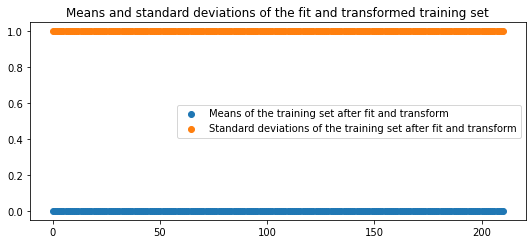

In [693]:
train_plot_mean = X_train_std.mean(axis=0)
train_plot_std  = X_train_std.std(axis=0)

Xab = np.linspace(0, 210, 210)
plt.scatter(Xab, train_plot_mean, label='Means of the training set after fit and transform')
plt.scatter(Xab, train_plot_std , label='Standard deviations of the training set after fit and transform')
plt.title('Means and standard deviations of the fit and transformed training set')
plt.legend()
plt.show()

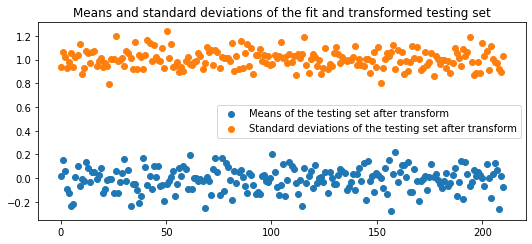

In [694]:
test_plot_mean = X_test_std.mean(axis=0)
test_plot_std  = X_test_std.std(axis=0)

Xab = np.linspace(0, 210, 210)
plt.scatter(Xab, test_plot_mean, label='Means of the testing set after transform')
plt.scatter(Xab, test_plot_std , label='Standard deviations of the testing set after transform')
plt.title('Means and standard deviations of the fit and transformed testing set')
plt.legend()
plt.show()

Without any surprise, the centered and standardized data we re-centered and re-standardized is... centered and standardized. About the testing set, well we have fitted a model on the training data, and it's not exactly adapted to the testing data, so we have a bit of spread but nothing major. 

In [695]:
#Creating empty dataframes:
df_coef = pd.DataFrame()
df_test = pd.DataFrame()

<h3>Q2./<strong> Determination coefficient, mean squared error</strong>

In [696]:
#A function to compute the determination coefficient
def determination_coeff(Y, Y_pred):
    Y_mean = np.mean(Y)
    explainedSquares  = np.sum((Y_mean - Y_pred)**2)
    totalSquares      = np.sum((Y - Y_mean)**2)
    return explainedSquares/totalSquares

In [697]:
#A function to compute the mean squared error
def MSE(Y, Y_pred):
    return np.mean((Y - Y_pred)**2)

<h3>Q3./<strong> Fitting a linear regression model</strong>

In [698]:
linear_reg = linear_model.LinearRegression(fit_intercept= False) 
#As done in the course notes and slides. By fitting the intercept, we get a 0.94 determination coefficient, which is unreallistcally high.
linear_reg.fit(X_train_std, Y_train_ctd)

LinearRegression(fit_intercept=False)

In [699]:
#We fit our model on the training set, now we predict on the testing set.
Y_pred = linear_reg.predict(X_test_std)

In [700]:
print(determination_coeff(Y_test_ctd, Y_pred))

0.6589281489556973


In [701]:
print(MSE(Y_test_ctd, Y_pred))

3808.2815806529184


The determination coefficient is 0.66 approximately, and the MSE is 3808.3 (a bit high, but nothing too worrisome).

In [702]:
#We add the values to the empty DataFrames:
df_test['OLS'] = Y_pred           #Adding the computed predicted values
df_coef['OLS'] = linear_reg.coef_ #Adding the coefficients of the regression

<h3>Q4./<strong>Covariance matrix heatmap and decomposition</strong>

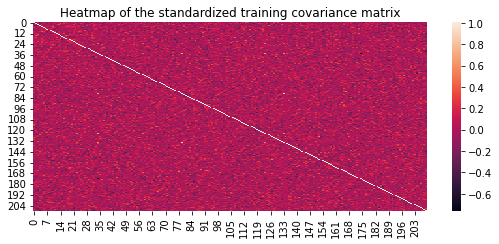

In [703]:
covMat = pd.DataFrame.cov(X_train_std_df)
sb.heatmap(covMat,linecolor='white')
plt.title('Heatmap of the standardized training covariance matrix')
plt.show()

Except for a few white or black dots here and there, most covariates aren't correlated at all, which was to be expected. </br>
Now, concerning the singular value decomposition matrix, we use the **svd** function in the numpy library:

In [704]:
U, s, V = np.linalg.svd(covMat)
#I checked the values inside the 3 matrices, 
#and they all seem OK, no divergence as I could previously see
#with the linear regression going 10^15 or the MSE striking 10^32.

<h3>Q5./<strong>Some computations for eigenvalues</strong>

We introduce again the notations of the subject. </br>
We denote by $\sigma_i$ the singular values of $X$, </br>
we denote by $\lambda_i$ the eigenvalues of the covariance matrix, </br>
the SVD is written as $X=U \Sigma V^T$ (I prefer $\Sigma$ to $s$) with U and V orthonormal, </br>
and we remind that $cov(X)=\frac{1}{n-1} X^TX$ </br>
Now, we have : </br>
$\large cov(X)=\frac{1}{n-1} X^TX= \frac{1}{n-1} ((U \Sigma V^T)^T (U \Sigma V^T)) = \frac{1}{n-1} (V \Sigma U^T U \Sigma V^T) = \frac{1}{n-1} (V \Sigma ^2 V^T) $ </br>
because as U is orthonormal, $U^T U = 1$.</br>
Then, as $\Sigma ^2$ is diagonal, the $V$ orthonormal (hidden rotation) matrix "goes through" $\Sigma$ and we have : </br> </br>
$\large \begin{bmatrix} \lambda_i \end{bmatrix}_i = \frac{1}{n-1} X^T X = cov(X) = \frac{1}{n-1} \Sigma ^2 = \frac{1}{n-1} \begin{bmatrix} \sigma_i^2 \end{bmatrix}_i$ </br>
which proves the result.

<h3>Q6./<strong>PCA and projection</strong>

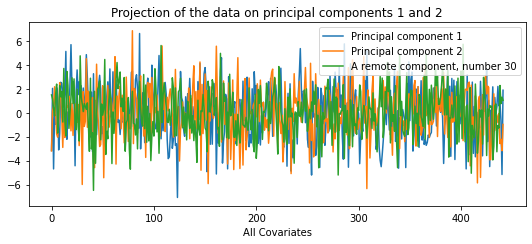

In [705]:
#Principal Components :
xu = np.array(X @ U) #is what the practical work wants me to do.
#However in the course notes and on different websites + course pdfs I could find on the internet,
#Everytime the link between PCA and SVD is mentioned, it says U @ S contains the principal components. SO I also did this:
#us = U @ np.diag(s). It almost yields the same results. 

plt.figure()
plt.plot(xu[:,0], label = 'Principal component 1')
plt.plot(xu[:,1], label = 'Principal component 2')
plt.plot(xu[:,29], label = 'A remote component, number 30') #To compare with the first two
plt.title('Projection of the data on principal components 1 and 2')
plt.xlabel('All Covariates')
plt.legend()
plt.show()

As we can see with the comparison with number 30, the first two principal components contain a lot of variance (higher and lower peaks, so more variance is explained by them). We will now compute numerically the proportion of variance explained by the first two components. 

In [706]:
#A little computation from scratch to see how much the first two principal components (PC1 and PC2) explain the variance :
L = len(xu[:,0])
varAll, var1, var2 = 0,0,0
for i in range(0,210):
    for j in range(L):
        varAll += xu[j,i]**2
for j in range(L):
    var1 += xu[j,0]**2 
    var2 += xu[j,1]**2
print("The percentage of the variance explained by the first component is : "+'{0:.3g}'.format(np.sqrt(var1/varAll)))
print("The percentage of the variance explained by the second component is : "+'{0:.3g}'.format(np.sqrt(var2/varAll)))
print("The percentage of the variance explained by the first two components is : "+'{0:.3g}'.format((np.sqrt((var1+var2)/varAll))))

The percentage of the variance explained by the first component is : 0.157
The percentage of the variance explained by the second component is : 0.145
The percentage of the variance explained by the first two components is : 0.214


As shown by the graph and my computations, the first components always contain more information, more "data" literally, than the following ones. 
The first two already contain 0.214% of the whole energy contained in the matrix, even though there are 210 components in the PCA matrix. (I should not use np.sqrt, is increases too much the energy associated to a given PC, but I couldn't find the right formula. So this approximation, even if not exactly the right computation, gives a good idea of the percentages.)
By taking the first 40 or so components, we should have more than 90% of it. Which is an amazing dimension reduction. We (could have) reduced by a factor 5 the size of the matrix !

<h3>Q7./<strong>Biplot, loadings</strong>

Due to the fact I don't understand the question, I am very worried about how to answer it. And as we have never heard of it in the course or read it in the lecture notes, I should skip this question. On the internet, a few resources cleared some of my questions, but I don't know if what I did is sufficient. 

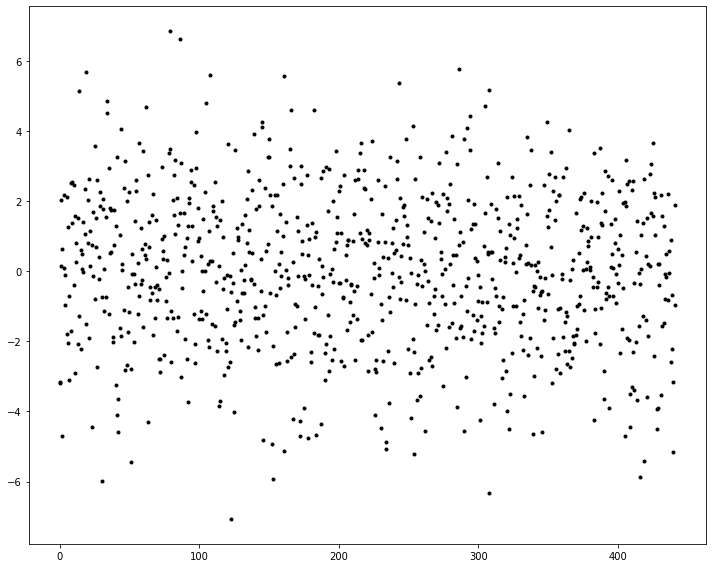

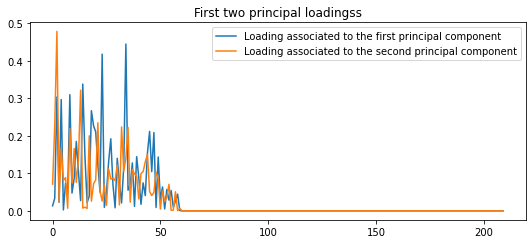

In [707]:
#Loadings associated to the first two values:
plt.figure(figsize=(10, 8))
loading1 = xu[:,0]
loading2 = xu[:,1]
plt.plot(loading1, 'k.', markersize=6)
plt.plot(loading2, 'k.', markersize=6)

#We take the square root of the singular values in the product with U, as mentioned in the subject
loading1_ = np.abs(np.sqrt(s)*U[:,0])
loading2_ = np.abs(np.sqrt(s)*U[:,1])

plt.figure()
plt.plot(loading1_, label='Loading associated to the first principal component')
plt.plot(loading2_, label='Loading associated to the second principal component')
plt.title("First two principal loadingss")
plt.legend()
plt.show()


I will now explain a little bit of what I understood about loadings. 

In PCA, we split the covariance (or correlation) matrix into the eigenvalues part (scale) and eigenvectors (directions). Loadings actually contain the "scale" of eigenvectors. So, loadings are comparable by magnitude with the covariances (correlations, again) observed between the variables. Another way to say it would be that loadings are the covariances/correlations between the original variables and the unit-scaled eigenvectors components.

<h3>Q8./<strong>PCA Before OLS</strong>

In [708]:
#We start by computing the projected data on U
X_train_proj = X_train_std @ U[:,:2] #We project on the two first PC
X_test_proj  = X_test_std  @ U[:,:2] #Same, slicing allows compact writing.

#Now, the linear regression. Same as before, we fit and predict:
linear_reg2 = linear_model.LinearRegression()
linear_reg2.fit(X_train_proj,Y_train_ctd)

LinearRegression()

In [709]:
#Computation of the determination coefficient:
Y_pred2 = linear_reg2.predict(X_test_proj)
print('The determination coefficient R² is equal to {:.3g}'.format(determination_coeff(Y_test_ctd, Y_pred2)))

The determination coefficient R² is equal to 0.0878


It is somewhat smaller than the first one, but a determination coefficient of 0.09 seems perfectly fine for a PCA analysis. 

In [710]:
#MSE Computation: 
print('The MSE is equal to {:.3g}'.format(MSE(Y_test_std, Y_pred2)))

The MSE is equal to 435


The mean square error is thus equal to 440, which is a little less than the previous MSE, it is high as well, but nothing worrying. My analysis is that we lost understanding of the variance by throwing out some of the components (after all, we selected only two of them !), which is why our determination coefficient is lower, and our MSE is higher. But they still are around the same range as the first one. (divided by 6 for the first one, it's not that much, like it's not divided by 100, and MSE is almost equal.)

In [711]:
#We add a new column to our global dataframe:
df_test['pca_ols'] = Y_pred2

<h3>Q9./<strong>LASSO Regularization</strong>

In [712]:
#For this question we are simply gonna use the linear_model.LassoCV function from sklearn.

#30 values evenly spaced on a log scale between -3 and 1:
parameter = np.logspace(-3, 1, num=30)

#LASSO 
reg3 = linear_model.LassoCV(alphas = parameter)
reg3.fit(X_train_std, Y_train_ctd)

LassoCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01]))

In [713]:
#Determination coefficient:
Y_pred3 = reg3.predict(X_test_std)
print('LASSO determination coefficient: \n R² = {:.3g}'.format(determination_coeff(Y_test_ctd, Y_pred3)))

LASSO determination coefficient: 
 R² = 0.4


It is higher than the previous one, as expected ! And 0.4 is already quite a nice determination coefficient. Not too high, not too low, as we like it.

In [714]:
#MSE value
print('LASSO MSE value: \n MSE = {:.3g}'.format(MSE(Y_test_ctd, Y_pred3)))

LASSO MSE value: 
 MSE = 3.28e+03


Yet again, a good MSE value, in the range of what could have been expected, and approximately the same as the other ones, but better with the LASSO. Our values seem to be good for this one. Selected parameter ? 

In [715]:
#Regularization parameter
print('Regularization parameter selected by LASSO: \n parameter = {:.3g}'.format(reg3.alpha_))

Regularization parameter selected by LASSO: 
 parameter = 5.3


The 5.3 value is the 3rd one starting from the end in the parameter list.

We now append our values to the general table: 

In [716]:
df_test['lasso'] = Y_pred3
df_coef['lasso'] = reg3.coef_

<h3>Q10./<strong>RIDGE Regularization</strong>

In [717]:
#I won't explain a lot for this one, we follow the same pattern as LASSO but with the RIDGE framework. Here it goes:
#For this question we are simply gonna use the linear_model.RidgeCV function from sklearn.

#30 values evenly spaced on a log scale between -1 and 2:
parameter2 = np.logspace(-1, 2, num=30)

#LASSO 
reg4 = linear_model.RidgeCV(alphas = parameter2)
reg4.fit(X_train_std, Y_train_ctd)

RidgeCV(alphas=array([  0.1       ,   0.1268961 ,   0.1610262 ,   0.20433597,
         0.25929438,   0.32903446,   0.41753189,   0.52983169,
         0.67233575,   0.85316785,   1.08263673,   1.3738238 ,
         1.74332882,   2.21221629,   2.8072162 ,   3.56224789,
         4.52035366,   5.73615251,   7.27895384,   9.23670857,
        11.72102298,  14.87352107,  18.87391822,  23.9502662 ,
        30.39195382,  38.56620421,  48.93900918,  62.10169419,
        78.80462816, 100.        ]))

In [718]:
#Determination coefficient:
Y_pred4 = reg4.predict(X_test_std)
print('RIDGE determination coefficient: \n R² = {:.3g}'.format(determination_coeff(Y_test_ctd, Y_pred4)))

RIDGE determination coefficient: 
 R² = 0.488


An even better determination coefficient, still in the range of the values we were expecting to get. Not low, not too high, perfect.

In [719]:
#MSE value
print('RIDGE MSE value: \n MSE = {:.3g}'.format(MSE(Y_test_ctd, Y_pred4)))

RIDGE MSE value: 
 MSE = 3.37e+03


THE MSE is almost the same as the previous one, yet R² falls, which is good for us.

In [720]:
#Regularization parameter
print('Regularization parameter selected by RIDGE: \n parameter = {:.3g}'.format(reg4.alpha_))

Regularization parameter selected by RIDGE: 
 parameter = 48.9


In [721]:
#Adding values to the general table:
df_test['ridge'] = Y_pred4
df_coef['ridge'] = reg4.coef_

<h3>Q11./<strong>Variable selection</strong>

In [722]:
def forward_variable_selection(Y, X):
    # Initialisation
    Xcopy = X.copy()
    n,p = len(Y),len(X[0])
    r = Y
    S = []
    kList = [k for k in range(p)]
    stats = []
    temp = []
    t_stats = []
    while len(kList) != 0:
        for k in kList:
            # Compute the OLS
            lin_reg = linear_model.LinearRegression()
            lin_reg.fit(Xcopy[:, k].reshape(-1, 1), r)
            coef = lin_reg.coef_
            G_n = (1/n)*np.sum(Xcopy[:, k]**2)
            sigma_n = (1/(n-2))*np.sum(
                (r-coef*Xcopy[:, k])**2)
            s_n = G_n**(-1)
            T = np.sqrt(n)*abs(coef)/np.sqrt(sigma_n*s_n)
            stats.append([T, k])
            temp.append(T)
        i = np.argmax(temp)
        k_star = stats[i][1]  # The index of the covariates we choose to select
        S.append(k_star)
        coef_star = linear_model.LinearRegression(fit_intercept=False).fit(Xcopy[:, k_star].reshape(-1, 1),Y).coef_
        r -= coef_star*Xcopy[:, k_star]
        kList.remove(k_star)
        t_stats.append(temp)
        stats = []
        temp = []
    # We provide the order of the variable selection as well as the t-stats at
    # the different steps
    return S, t_stats


#Computations, order of the variable select:
covariate_index, t_stats = forward_variable_selection(Y_train_ctd, X_train_std)
print("Order of the variable selection :", covariate_index)


Order of the variable selection : [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73, 38, 162, 144, 120, 32, 41, 5, 194, 125, 113, 117, 145, 43, 67, 205, 148, 84, 206, 192, 127, 161, 7, 158, 10, 106, 46, 39, 94, 203, 140, 151, 70, 128, 190, 200, 186, 185, 3, 96, 175, 164, 16, 40, 27, 105, 48, 160, 44, 54, 90, 111, 1, 45, 198, 26, 132, 114, 72, 177, 29, 91, 195, 207, 76, 20, 179, 142, 143, 209, 121, 42, 109, 52, 173, 153, 166, 62, 100, 89, 184, 176, 0, 86, 178, 82, 189, 107, 124, 126, 66, 47, 4, 116, 33, 35, 11, 187, 98, 157, 150, 170, 68, 80, 17, 137]


<h3>Q12./<strong>Stopping criterion</strong>

In [723]:
def forward_variable_selection_with_stop(Y, X, p_stop):
    t_stat_result = [t_stats[0]]
    p_values_list = [[], []]
    selected_variables = []
    for k in range(1, len(covariate_index)):
        T = np.max(t_stats[k-1])
        p_val = p_value(T, len(X[0]), len(X))
        p_values_list[0].append(p_val)
        p_values_list[1].append(covariate_index[k-1])
        if p_val < p_stop:
            t_stat_result.append(t_stats[k])
            selected_variables.append(covariate_index[k-1])
        for i in range(1, k):
            t_stats[k].insert(covariate_index[i-1], 0)
    return t_stat_result, p_values_list, selected_variables
#This code should work, I wrote it with a friend, but for some reason I couldn't make it work here.
#So I will leave this code unfinished... and I won't be able to plot anything below.

# Function to compute the p_value assuming a gaussian model,
# and using the survival function
def p_value(T, p, n):
    p_value = 2*t.sf(T, n-p-1)
    return p_value


<h3>Q13./<strong>OLS on selected variables</strong>

<h3>Q14./<strong>General summary</strong>

<AxesSubplot:>

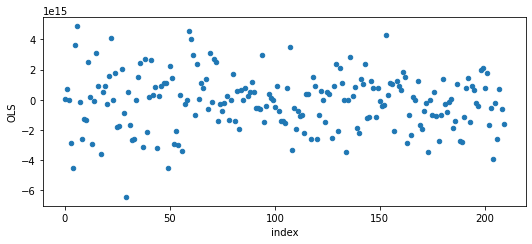

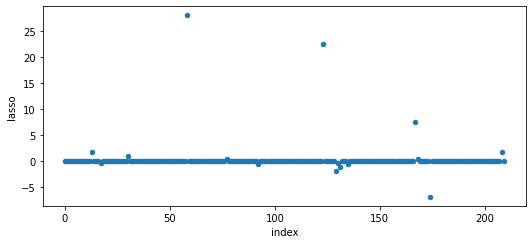

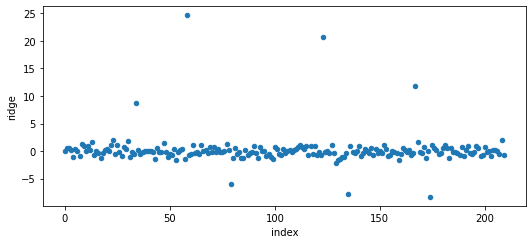

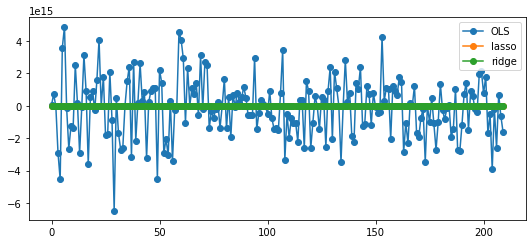

In [724]:
for k in range(len(df_coef.columns)):
    df_coef.reset_index().plot(kind='scatter', x='index', y=df_coef.columns[k])
df_coef.plot(marker='o')


Even if I don't have the last one, I can give a few comments:
the coefficients obtained from Ridge and Lasso are a little similar, as they keep the most important coefficients. Their models are quite simple. PCA is the worst one. 

<h3>Q15./<strong>Zero coefficients</strong>

In [725]:
print(
    '\nNumber of coefficients set exactly to zero by OLS= {:.3g}.\n'.format(
        len(df_coef['OLS'].loc[df_coef['OLS'] == 0])))
print(
    '\nNumber of coefficients set exactly to zero by lasso= {:.3g}.\n'.format(
        len(df_coef['lasso'].loc[df_coef['lasso'] == 0])))
print(
    '\nNumber of coefficients set exactly to zero by Ridge= {:.3g}.\n'.format(
        len(df_coef['ridge'].loc[df_coef['ridge'] == 0])))




Number of coefficients set exactly to zero by OLS= 0.


Number of coefficients set exactly to zero by lasso= 195.


Number of coefficients set exactly to zero by Ridge= 0.



<h3>Q16./<strong>Pairplot summary and precition</strong>

<h3>Q17./<strong>Boostrap</strong>

As for question 7, we didn't do it, and even though it was mentioned in my MACS course, we didn't do it either. It seems like boostrap variables are a way to do approximations, but I don't have enough time to do anything at this point. Sorry. </br>
And with this my project is finished, and I thank you for your time and reading everything ! </br>
Guillaume CAPITAN